In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')

np.random.seed(42)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
indo = pd.read_excel('data/indonesia_tourist.xlsx')

In [4]:
indo.head(3)

,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,...,tototh_$,totshopping_$,totexp_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,2015-01-01,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.145161,...,0.0,854.853136,1096.186995,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.937500,...,0.0,171.519802,379.309926,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.866667,...,0.0,104.853136,420.727677,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN


In [5]:
indo.columns

Index(['case', 'Year', 'R.mth', 'date', 'intv_nam', 'Country_residence',
       'City_residence', 'Purpose_grp', 'Purpose', 'Weights_QTR',
       'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'langint', '1st_visit',
       'length_stay', 'travel_type', 'f1_gender', 'f3_occupation',
       'f4_industry', 'f5_designation', 'f5_designation.oth', 'shop_$fash',
       'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
       'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any', 'totacc_$',
       'totfnb_$', 'tottran_$', 'totbiz_$', 'totedu_$', 'totmedi_$',
       'tototh_$', 'totshopping_$', 'totexp_$', 'MainAccomm', 'MainHotel',
       'travel_companion.1', 'travel_companion.2', 'travel_companion.3',
       'travel_companion.4', 'travel_companion.5'],
      dtype='object')

## Pre-processing

In [6]:
indo.isnull().sum()

case                     0
Year                     0
R.mth                    0
date                     0
intv_nam                 0
Country_residence        0
City_residence           0
Purpose_grp              0
Purpose                  0
Weights_QTR              0
Air_Terminal          3190
Sea_Terminal          6059
Land_Terminal         8532
langint                  0
1st_visit                0
length_stay              0
travel_type              0
f1_gender                0
f3_occupation            0
f4_industry           2844
f5_designation        3096
f5_designation.oth    2969
shop_$fash              80
shop_$jew               80
shop_$wat               80
shop_$well              80
shop_$food              80
shop_$gift              80
shop_$ctec              80
shop_$anti              80
shop_$oth               80
shop_$any               80
totacc_$                 0
totfnb_$                 0
tottran_$                0
totbiz_$                 0
totedu_$                 0
t

In [7]:
# drop columns with a lot of NA values
indo.drop(
    columns=[
        'Air_Terminal', 'Sea_Terminal', 'Land_Terminal',
        'f4_industry', 'f5_designation', 'f5_designation.oth',
        'travel_companion.2', 'travel_companion.3', 'travel_companion.4', 'travel_companion.5',
    ], 
    inplace=True
)

In [8]:
# calculate total spending for shopping and other categories
indo['total_shopping'] = indo.loc[:,[
    'shop_$fash', 'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 
    'shop_$gift', 'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any'
]].sum(axis=1)

indo['total_others'] = indo.loc[:,[
    'totacc_$', 'totfnb_$', 'tottran_$', 'totbiz_$', 'totedu_$', 'totmedi_$',
    'tototh_$', 'totshopping_$'
]].sum(axis=1)

In [9]:
# drop irrelevant columns and columns that directly depends on type of accomodation
indo.drop(
    columns = [
        'shop_$fash','shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
        'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any', 'totacc_$',
        'totfnb_$', 'tottran_$', 'totbiz_$', 'totedu_$', 'totmedi_$',
        'tototh_$', 'totshopping_$', 'case',
        'Country_residence', 'Purpose_grp','date',
        'Weights_QTR', 'MainHotel', 'intv_nam',
    ],
    inplace = True
)

In [10]:
indo.describe()

,Year,totexp_$,total_shopping,total_others
count,8887.000000,8.887000e+03,8887.000000,8.887000e+03
mean,2014.503545,3.685110e+03,331.037960,3.685110e+03
std,0.500016,2.736304e+05,882.649082,2.736304e+05
min,2014.000000,8.086393e+01,0.000000,8.086393e+01
25%,2014.000000,2.070473e+02,0.000000,2.070473e+02
50%,2015.000000,4.279709e+02,100.000000,4.279709e+02
75%,2015.000000,8.552404e+02,341.557500,8.552404e+02
max,2015.000000,2.579524e+07,30000.000000,2.579524e+07


In [11]:
indo.head(3)

,Year,R.mth,City_residence,Purpose,langint,1st_visit,length_stay,travel_type,f1_gender,f3_occupation,totexp_$,MainAccomm,travel_companion.1,total_shopping,total_others
0,2015,January,Yogyakarta,Holiday/ Rest & Relax,English,No,4 days,Non-Packaged,Male,"Businessman (small company, <50 people)",1096.186995,Hotel,Spouse,1500.000000,1096.186995
1,2015,January,Batam,Holiday/ Rest & Relax,English,No,2 days,Packaged,Male,"Professiols (doctor, lawyer, lecturer, etc)",379.309926,Hotel,Spouse,133.333333,379.309926
2,2015,January,Batam,Holiday/ Rest & Relax,English,No,3 days,Non-Packaged,Female,Homemaker (Full time),420.727677,Hotel,Spouse,0.000000,420.727677


In [12]:
categorical_data = []

for x in indo.dtypes.index:
    if indo.dtypes[x] == 'object':
        categorical_data.append(x)
categorical_data

['R.mth',
 'City_residence',
 'Purpose',
 'langint',
 '1st_visit',
 'length_stay',
 'travel_type',
 'f1_gender',
 'f3_occupation',
 'MainAccomm',
 'travel_companion.1']

In [13]:
indo.isnull().sum()

Year                   0
R.mth                  0
City_residence         0
Purpose                0
langint                0
1st_visit              0
length_stay            0
travel_type            0
f1_gender              0
f3_occupation          0
totexp_$               0
MainAccomm            33
travel_companion.1     0
total_shopping         0
total_others           0
dtype: int64

In [14]:
indo.dropna(inplace=True)

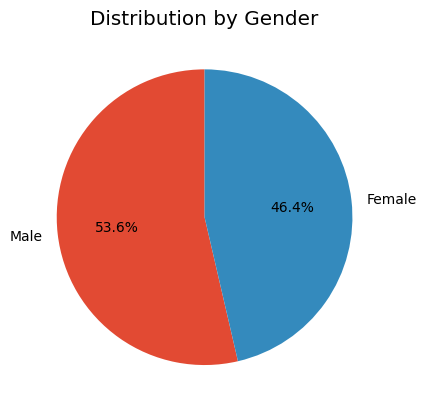

In [15]:
gender = indo['f1_gender'].value_counts()
plt.title('Distribution by Gender')
plt.pie([gender.loc['Male'], gender.loc['Female']], labels=['Male', 'Female'], autopct='%.1f%%', startangle=90)
plt.savefig('img/indo_gender.png', bbox_inches='tight')
plt.show()

In [16]:
round(indo['MainAccomm'].value_counts(normalize=True) * 100.0, 2)

Hotel                                                          48.52
Stayed with relatives/ friends                                 20.45
Accommodation not required - Day Tripper                       19.72
Hostel (Rental by bed)                                          5.18
Service Apartment                                               2.80
Own Residence                                                   1.01
Accommodation not required - On-board Cruise                    0.64
Homestay                                                        0.56
Other paid accommodations (e.g.chalets, country clubs, etc)     0.42
Accommodation not required - Others                             0.32
Other non-paid accommodations (e.g. religious places, camp,     0.26
Student Hostel                                                  0.07
Hospital                                                        0.05
Name: MainAccomm, dtype: float64

In [17]:
indo = indo.replace(
    [
        'Accommodation not required - Day Tripper', 
        'Accommodation not required - On-board Cruise',
        'Accommodation not required - Others'
    ],
    'Accommodation not required'
)

indo = indo.replace(
    [
        'Hostel (Rental by bed)', 
        'Service Apartment',
        'Homestay',
        'Other paid accommodations (e.g.chalets, country clubs, etc)',
        'Student Hostel',
        'Hospital'
    ],
    'Other paid'
)

indo = indo.replace(
    [
        'Own Residence', 
        'Other non-paid accommodations (e.g. religious places, camp,'
    ],
    'Other non-paid'
)

In [18]:
round(indo['MainAccomm'].value_counts(normalize=True) * 100.0, 2)

Hotel                             48.52
Accommodation not required        20.68
Stayed with relatives/ friends    20.45
Other paid                         9.08
Other non-paid                     1.26
Name: MainAccomm, dtype: float64

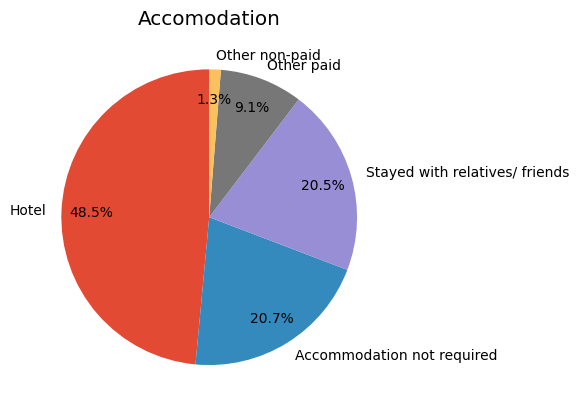

In [19]:
plt.figure()
plt.title('Accomodation')
indo['MainAccomm'].value_counts().plot.pie(autopct='%.1f%%', label="", startangle=90, pctdistance=0.8)
plt.savefig('img/indo_accom.png', bbox_inches='tight')
plt.show()

In [20]:
indo.isnull().sum()

Year                  0
R.mth                 0
City_residence        0
Purpose               0
langint               0
1st_visit             0
length_stay           0
travel_type           0
f1_gender             0
f3_occupation         0
totexp_$              0
MainAccomm            0
travel_companion.1    0
total_shopping        0
total_others          0
dtype: int64

## Encode

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer


for col in categorical_data:
    if col == 'MainAccomm':
        le = LabelEncoder()
        indo[col] = le.fit_transform(indo[col].astype(str))    
    else:
        ohe = OneHotEncoder(sparse=False)
        ohe.fit(indo[col].astype(str).values.reshape(-1,1))
        transformed = ohe.transform(indo[col].astype(str).values.reshape(-1,1))
        ohe_df = pd.DataFrame(transformed, columns=ohe.get_feature_names())
        indo = pd.concat([indo.reset_index(drop=True), ohe_df], axis=1).drop([col], axis=1)

In [22]:
indo.columns

Index(['Year', 'totexp_$', 'MainAccomm', 'total_shopping', 'total_others',
       'x0_April', 'x0_August', 'x0_December', 'x0_February', 'x0_January',
       ...
       'x0_Children aged 40 yrs and above', 'x0_Children aged 8-12 yrs',
       'x0_Friends', 'x0_Grandparents/ Grandparents-in-law',
       'x0_Other relatives', 'x0_Others', 'x0_Parents/ Parents-in-law',
       'x0_Partner/ Boyfriend/ Girlfriend', 'x0_Siblings', 'x0_Spouse'],
      dtype='object', length=172)

In [23]:
indo['MainAccomm'].value_counts()

1    4296
0    1831
4    1811
3     804
2     112
Name: MainAccomm, dtype: int64

## Split data

In [24]:
y = indo['MainAccomm']
X = indo.drop(['MainAccomm'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
len(y), len(y_train), len(y_test)

(8854, 7083, 1771)

In [27]:
num_classes = 5

In [28]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
pred_svm = svm_clf.predict(X_test)
print(f'Train acc = {(accuracy_score(y_train, svm_clf.predict(X_train)) * 100.0):.2f}%')
print(f'Test acc = {(accuracy_score(y_test, pred_svm) * 100.0):.2f}%')

Train acc = 48.72%
Test acc = 47.71%


In [30]:
from sklearn.neighbors import KNeighborsClassifier

for n in [1, 2, 5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    print(f'n_neighbors = {n}; train acc = {(accuracy_score(y_train, knn.predict(X_train)) * 100.0):.2f}%', end='')
    print(f'; test acc = {(accuracy_score(y_test, pred_knn) * 100.0):.2f}%')

n_neighbors = 1; train acc = 100.00%; test acc = 60.30%
n_neighbors = 2; train acc = 81.15%; test acc = 61.94%
n_neighbors = 5; train acc = 76.34%; test acc = 66.57%
n_neighbors = 10; train acc = 72.96%; test acc = 67.25%
n_neighbors = 20; train acc = 71.03%; test acc = 66.74%


In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f'Train acc = {(accuracy_score(y_train, tree.predict(X_train)) * 100.0):.2f}%')
print(f'Test acc = {(accuracy_score(y_test, pred_tree) * 100.0):.2f}%')

Train acc = 100.00%
Test acc = 75.83%


In [32]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="modified_huber", max_iter=200)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(f'Train acc = {(accuracy_score(y_train, sgd.predict(X_train)) * 100.0):.2f}%')
print(f'Test acc = {(accuracy_score(y_test, pred_sgd) * 100.0):.2f}%')

Train acc = 56.93%
Test acc = 55.45%


In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

ovr = OneVsRestClassifier(LinearSVC(random_state=42, max_iter=1e5))
ovr.fit(X_train, y_train)
pred_ovr = ovr.predict(X_test)
print(f'Train acc = {(accuracy_score(y_train, ovr.predict(X_train)) * 100.0):.2f}%')
print(f'Test acc = {(accuracy_score(y_test, pred_ovr) * 100.0):.2f}%')

Train acc = 80.49%
Test acc = 78.43%


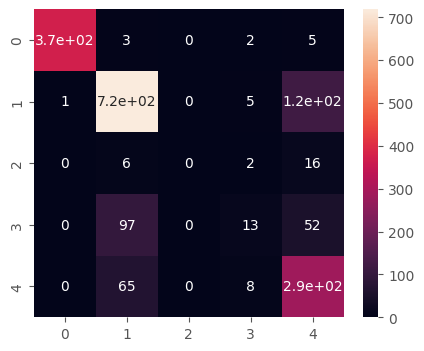

In [35]:
cf_mat = confusion_matrix(y_test, pred_ovr)
cm_df = pd.DataFrame(cf_mat, index=[i for i in range(num_classes)], columns=[i for i in range(num_classes)])
plt.figure(figsize=(5,4))
sb.heatmap(cm_df, annot=True)
plt.show()